# Importo librerias

In [6]:
%matplotlib inline
!pip install fermat
!pip install POT

     |████████████████████████████████| 440kB 3.9MB/s 


In [7]:
import fermat as F
import numpy as np
import scipy.sparse as sp
from scipy.spatial import  distance_matrix
from sklearn.manifold import TSNE
from scipy.optimize import minimize
from sklearn.neighbors import KDTree
from scipy.optimize import LinearConstraint
from scipy.sparse import csr_matrix
import ot.plot


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pl
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

#Baricentro

## Parabola

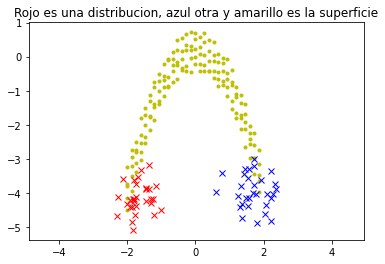

In [8]:
puntos=30

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1)
W=np.concatenate((x,y),axis=1)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)
#W=np.concatenate((W,-W-[0,8]),axis=0)

"""


W=np.concatenate((W,np.random.random((300,2))*[4,1]-[2,4.5]),axis=0)


W=np.random.random((300,2))*[4,1]-[2,4.5]
"""

y1, y2 = np.random.multivariate_normal([1.7,-4], [[0.2,0],[0,0.2]], puntos).T
y1=np.array(y1)
y2=np.array(y2)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

Ycol=np.concatenate((y1,y2),axis=1)
Y=Ycol.flatten()


x1, x2 = np.random.multivariate_normal([-1.7,-4], [[0.2,0],[0,0.2]], puntos).T
x1=np.array(x1)
x2=np.array(x2)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
Zcol=np.concatenate((x1,x2),axis=1)
Z=Zcol.flatten()





plt.plot(W[:,0],W[:,1],'.',c='y')
plt.plot(x1,x2,'x',c='r')
plt.plot(y1,y2,'x',c='b')
plt.axis('equal')
plt.title('Rojo es una distribucion, azul otra y amarillo es la superficie')
plt.show()

In [9]:

data=np.concatenate((Zcol,Ycol,W),axis=0)
a=np.concatenate((np.ones(puntos),np.ones(data.shape[0]-puntos)*1e-15))/puntos
b=np.roll(a,puntos)
A = np.vstack((a, b)).T
n_distributions = A.shape[1]


alpha=2


method='FW'
model=F.Fermat(alpha, path_method=method,k=100)
model.fit(np.matrix(distance_matrix(data,data)))
fermat_distances = model.get_distances()


M = fermat_distances

#M=ot.utils.dist(data,data) #EUCLIDEO AL CUADRADO
#M=distance_matrix(data,data) #EUCLIDEO

M=M**2

M=np.ascontiguousarray(M)
M /= M.max()

In [10]:
alpha2 = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha2, alpha2])

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

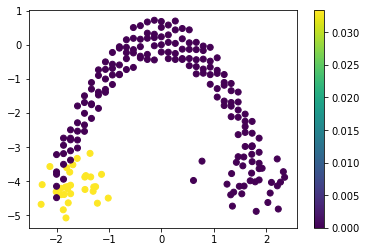

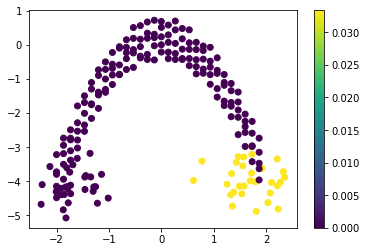

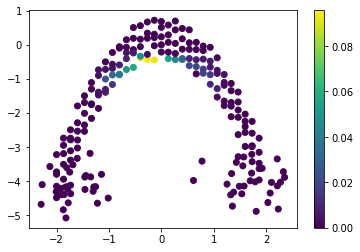

In [11]:
for aux in [a,b,bary_wass]:
    fig, ax = plt.subplots()
    im = ax.scatter(data[:,0], data[:,1], c=aux)
    fig.colorbar(im, ax=ax)

## Superficie euclidea

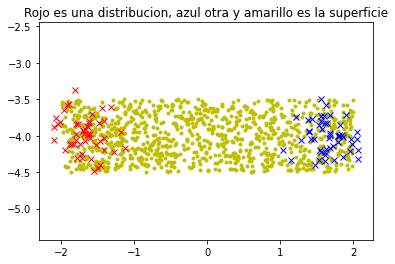

In [12]:
puntos=50
"""
dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1)
W=np.concatenate((x,y),axis=1)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)
W=np.concatenate((W,-W-[0,8]),axis=0)



W=np.concatenate((W,np.random.random((300,2))*[4,1]-[2,4.5]),axis=0)

"""

W=np.random.random((1000,2))*[4,1]-[2,4.5]


y1, y2 = np.random.multivariate_normal([1.7,-4], [[0.05,0],[0,0.05]], puntos).T
y1=np.array(y1)
y2=np.array(y2)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

Ycol=np.concatenate((y1,y2),axis=1)
Y=Ycol.flatten()


x1, x2 = np.random.multivariate_normal([-1.7,-4], [[0.05,0],[0,0.05]], puntos).T
x1=np.array(x1)
x2=np.array(x2)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
Zcol=np.concatenate((x1,x2),axis=1)
Z=Zcol.flatten()





plt.plot(W[:,0],W[:,1],'.',c='y')
plt.plot(x1,x2,'x',c='r')
plt.plot(y1,y2,'x',c='b')
plt.axis('equal')
plt.title('Rojo es una distribucion, azul otra y amarillo es la superficie')
plt.show()

In [13]:
data=np.concatenate((Zcol,Ycol,W),axis=0)
a=np.concatenate((np.ones(puntos),np.ones(data.shape[0]-puntos)*1e-15))/puntos
b=np.roll(a,puntos)
A = np.vstack((a, b)).T
n_distributions = A.shape[1]


alpha=2


method='FW'
model=F.Fermat(alpha, path_method=method,k=100)
model.fit(np.matrix(distance_matrix(data,data)))
fermat_distances = model.get_distances()


M = fermat_distances
M=M**2

#M=ot.utils.dist(data,data) #EUCLIDEO AL CUADRADO
#M=distance_matrix(data,data) #EUCLIDEO

M=np.ascontiguousarray(M)
M /= M.max()

In [14]:
alpha2 = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha2, alpha2])

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

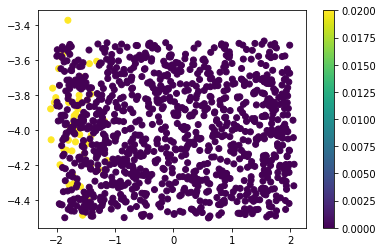

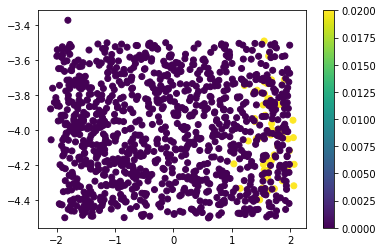

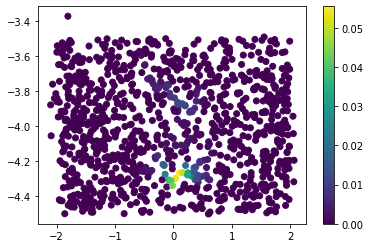

In [15]:
for aux in [a,b,bary_wass]:
    fig, ax = plt.subplots()
    im = ax.scatter(data[:,0], data[:,1], c=aux)
    fig.colorbar(im, ax=ax)

## Doble parabola

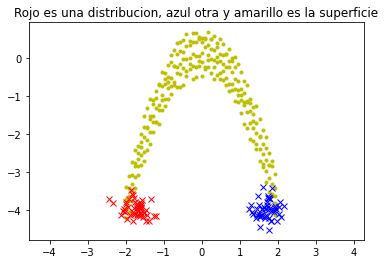

In [16]:
puntos=50

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1)
W=np.concatenate((x,y),axis=1)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)
#W=np.concatenate((W,-W-[0,8]),axis=0)





y1, y2 = np.random.multivariate_normal([1.7,-4], [[0.05,0],[0,0.05]], puntos).T
y1=np.array(y1)
y2=np.array(y2)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

Ycol=np.concatenate((y1,y2),axis=1)
Y=Ycol.flatten()


x1, x2 = np.random.multivariate_normal([-1.7,-4], [[0.05,0],[0,0.05]], puntos).T
x1=np.array(x1)
x2=np.array(x2)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
Zcol=np.concatenate((x1,x2),axis=1)
Z=Zcol.flatten()





plt.plot(W[:,0],W[:,1],'.',c='y')
plt.plot(x1,x2,'x',c='r')
plt.plot(y1,y2,'x',c='b')
plt.axis('equal')
plt.title('Rojo es una distribucion, azul otra y amarillo es la superficie')
plt.show()

In [17]:
data=np.concatenate((Zcol,Ycol,W),axis=0)
a=np.concatenate((np.ones(puntos),np.ones(data.shape[0]-puntos)*1e-15))/puntos
b=np.roll(a,puntos)
A = np.vstack((a, b)).T
n_distributions = A.shape[1]


alpha=2


method='FW'
model=F.Fermat(alpha, path_method=method,k=100)
model.fit(np.matrix(distance_matrix(data,data)))
fermat_distances = model.get_distances()


M = fermat_distances

#M=ot.utils.dist(data,data) EUCLIDEO AL CUADRADO
#M=distance_matrix(data,data) EUCLIDEO
M=M**2

M=np.ascontiguousarray(M)
M /= M.max()

In [18]:
alpha2 = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha2, alpha2])

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

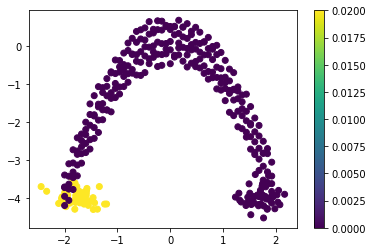

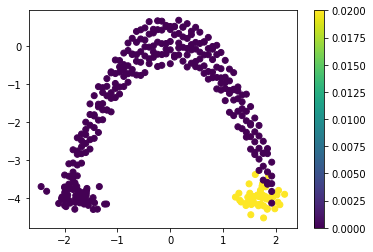

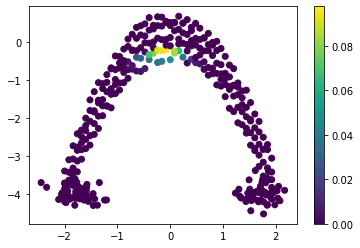

In [19]:
for aux in [a,b,bary_wass]:
    fig, ax = plt.subplots()
    im = ax.scatter(data[:,0], data[:,1], c=aux)
    fig.colorbar(im, ax=ax)

# Transpore Optimo (optimización combinatoria)

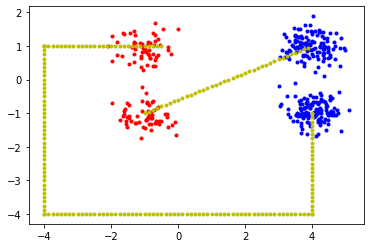

In [20]:
puntos=int(500/4)
#Z son los iniciales
#Y son los objetivo
#x son los Z transformados, lo que voy a optimizar

#OJO GUARDO LA DATA COMO XY XY XY XY (no como XXXX YYYYY ) 

y1, y2 = np.random.multivariate_normal([4,-1], [[0.2,0],[0,0.1]], puntos).T
y1=np.array(y1)
y2=np.array(y2)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

Ycol=np.concatenate((y1,y2),axis=1)

y1, y2 = np.random.multivariate_normal([4,1], [[0.2,0],[0,0.1]], puntos).T
y1=np.array(y1)
y2=np.array(y2)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

Ycol=np.concatenate((Ycol,np.concatenate((y1,y2),axis=1)),axis=0)

Y=Ycol.flatten()


x1, x2 = np.random.multivariate_normal([-1,1], [[0.2,0],[0,0.1]], puntos//2).T
x1=np.array(x1)
x2=np.array(x2)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
Zcol=np.concatenate((x1,x2),axis=1)
x1, x2 = np.random.multivariate_normal([-1,-1], [[0.2,0],[0,0.1]], puntos//2).T
x1=np.array(x1)
x2=np.array(x2)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)

Zcol=np.concatenate((Zcol,np.concatenate((x1,x2),axis=1)),axis=0)


Z=Zcol.flatten()


top=-np.ones((40,2))
dx=5/top.shape[0]
for i in range(top.shape[0]):
    top[i,:]=[i*dx-1,0.4*i*dx-1]
    
    

bottom=np.ones((29,2))-[1.5,0]

dx=5/top.shape[0]
for i in range(bottom.shape[0]):
    bottom[i,0]-=i*dx
    
bottom2=np.ones((43,2))-[5,0]

dx=5/top.shape[0]
for i in range(bottom2.shape[0]-2):
    bottom2[i,1]-=i*dx
    
bottom3=np.ones((65,2))-[5,5]

dx=5/top.shape[0]
for i in range(bottom3.shape[0]):
    bottom3[i,0]+=i*dx
    
bottom4=np.ones((25,2))+[3,-5]

dx=5/top.shape[0]
for i in range(bottom4.shape[0]):
    bottom4[i,1]+=i*dx

bottom=np.concatenate((bottom,bottom2,bottom3,bottom4),axis=0)
    
plt.axis('equal')
plt.plot(Zcol[:,0],Zcol[:,1],'.',c='r')
plt.plot(Ycol[:,0],Ycol[:,1],'.',c='b')
plt.plot(top[:,0],top[:,1],'.',c='y')
plt.plot(bottom[:,0],bottom[:,1],'.',c='y')

Text(0.5, 1.0, 'OT matrix with samples')

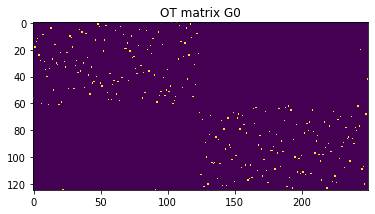

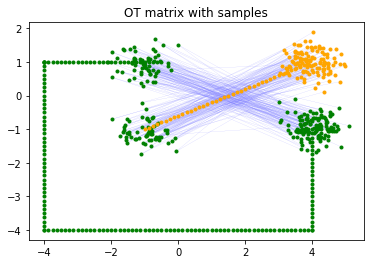

In [21]:
data=np.concatenate((Zcol,Ycol,bottom,top),axis=0)
n=puntos*2
a, b = np.ones((puntos,)) / puntos, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
alpha=3
method='FW'
model=F.Fermat(alpha, path_method=method,k=100)
model.fit(np.matrix(distance_matrix(data,data)))
fermat_distances = model.get_distances()


M = fermat_distances[0:puntos,puntos:3*puntos]
M=np.ascontiguousarray(M)
M /= M.max()


G0 = ot.emd(a, b, M)

pl.figure(3)
pl.imshow(G0, interpolation='nearest')
pl.title('OT matrix G0')


xs=Zcol
xt=Ycol
n=puntos
pl.figure(4)
ot.plot.plot2D_samples_mat(xs,xt, G0, c=[.5, .5, 1],lw=0.1)
pl.plot(xs[:n, 0], xs[:n, 1], '.g', label='Source')
pl.plot(xt[:n, 0], xt[:n, 1], '.g', label='Target')
pl.plot(xs[n:, 0], xs[n:, 1], '.',c='orange', label='Source')
pl.plot(xt[n:, 0], xt[n:, 1], '.',c='orange', label='Target')
plt.plot(top[:,0],top[:,1],'.',c='orange')
plt.plot(bottom[:,0],bottom[:,1],'.g')
pl.title('OT matrix with samples')



Text(0.5, 1.0, 'OT matrix with samples')

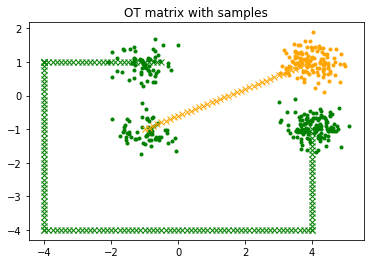

In [22]:
xs=Zcol
xt=Ycol
n=puntos
pl.figure(4)
#ot.plot.plot2D_samples_mat(xs,xt, G0, c=[.5, .5, 1],lw=0.01)
pl.plot(xs[:n, 0], xs[:n, 1], '.g', label='Source')
pl.plot(xt[:n, 0], xt[:n, 1], '.g', label='Target')
pl.plot(xs[n:, 0], xs[n:, 1], '.',c='orange', label='Source')
pl.plot(xt[n:, 0], xt[n:, 1], '.',c='orange', label='Target')
plt.plot(top[:,0],top[:,1],'x',c='orange')
plt.plot(bottom[:,0],bottom[:,1],'xg')
pl.title('OT matrix with samples')